<a href="https://colab.research.google.com/github/italolima04/monitoria-probabilidade-estatistica/blob/master/Pesquisa-PID/An%C3%A1lise-Descritiva-Tweets/An%C3%A1lise_Descritiva_Twitter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Por que explorar a Base de Dados do Twitter ?

* Em 2019 o Brasil ocupava a 6¬∫ posi√ß√£o do ranking de pa√≠ses com maior quantidade de usu√°rios do Twitter.

* Pesquisas de 2020 apontam que cerca de 141 milh√µes de usu√°rios s√£o dos Estados Unidos e o Brasil ocupa o segundo lugar obtendo a cifra de 41 milh√µes, depois de um crescimento de 23% desde o in√≠cio do ano. 

* 500 milh√µes de tweets s√£o postados por dia, o que quantifica cerca de 6000 tweets por segundo.

* Existe um total de 1.3 bilh√µes de Contas do Twitter, e estima-se que 328 milh√µes estejam ativas.



**Em raz√£o da pandemia da Covid-19, as pessoas t√™m recorrido mais ainda ao Twitter para acompanhar os fatos em tempo real.**

* Segundo a pr√≥pria empresa, o n√∫mero de usu√°rios ativos monetiz√°veis chegou a 164 milh√µes, durante o primeiro trimestre de 2020, superando em 23% o ano anterior. 

* Al√©m disso, houve um crescimento de 45% registrado ap√≥s o primeiro trimestre no uso das p√°ginas especiais de curadoria (h√° uma espec√≠fica para a covid) e de 30% no envio de mensagens diretas.

# Acessando a API

**Dados s√£o informa√ß√µes, derivadas de observa√ß√µes, contagens, explora√ß√µes ou respostas.**

No contexto de redes sociais, a an√°lise de sentimentos apresenta diversos potenciais objetivos, nesse caso, o cunho social √© o enfoque, visto que em um per√≠odo pand√™mico √© importante reconhecer o sentimento das pessoas em torno dos fatos ocorridos, isso pode servir como base na tomada de decis√µes por parte de governos e empresas.

In [1]:
#Importando a biblioteca Tweepy e Pandas
import tweepy as tp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


**Para este exemplo pr√°tico envolvendo a coleta e o pr√©-processamento de dados do Twitter, iremos utilizar uma amostra (uma parcela dos dados), que ser√£o coletados a partir da API da pr√≥pria rede social.**


"Uma API √© um conjunto de rotinas e padr√µes estabelecidos por um software.‚Äù 

As API's s√£o uma forma de integrar sistemas e conectar aplica√ß√µes.


In [2]:
#Manipulando arquivos em Python para leitura de um documento local que cont√©m as 4 chaves de acesso.
#Atribuindo cada chave a uma vari√°vel.
with open ('twitter_tokens.txt', 'r') as dados:
  chave_consumidor = dados.readline().strip('\n')
  segredo_consumidor = dados.readline().strip('\n')
  token_acesso = dados.readline().strip('\n')
  token_acesso_segredo = dados.readline().strip('\n')

In [3]:
#Preenchendo as informa√ß√µes de autentica√ß√£o atrav√©s dados do consumidor. (Analogia ao Login)
autenticacao = tp.OAuthHandler(chave_consumidor, segredo_consumidor)

In [4]:
#Preenchendo os tokens de acesso. (Analogia a senha)
autenticacao.set_access_token(token_acesso, token_acesso_segredo)

In [5]:
#Concluindo o Processo de Autentica√ß√£o e criando inst√¢ncia da API.
twitter = tp.API(autenticacao)

**Configurando Exibi√ß√£o dos Dados.**

In [6]:
#Utilizando o m√©todo de busca, e passando o q(query) como par√¢metro. (O "q" se deseja buscar).
#Percorrendo os tweets buscados e exibindo algumas informa√ß√µes, como nome do usu√°rio e texto publicado (tweet).
tweets = twitter.search(q='coronavirus')
for tweet in tweets:
  print(f'Usu√°rio: {tweet.user.screen_name} - Tweet: {tweet.text}')

Usu√°rio: SportsGrad2010 - Tweet: RT @CBSNews: Nearly 84% of Florida's ICU beds are filled amid rising coronavirus cases https://t.co/lXMO5wUbCk
Usu√°rio: charleskirby981 - Tweet: RT @drdavidsamadi: Calling the coronavirus in America uncontrolled is simply untrue.

We have many treatments to minimize the effects of th‚Ä¶
Usu√°rio: juliemoss101 - Tweet: RT @guidedogs: "The guide dog cannot read one-way arrows" Why people with sight loss need support and understanding as lockdown eases and s‚Ä¶
Usu√°rio: maureentesoro - Tweet: RT @samanthajgross: In Miami-Dade County, we can see hospitalization data but the state isn‚Äôt releasing the data for other counties.

State‚Ä¶
Usu√°rio: Tommy_2Tall - Tweet: RT @MollyJongFast: If trump had spent as much time on coronavirus as he has on harassing Ilhan Omar, her father might still be alive and no‚Ä¶
Usu√°rio: honnenogod - Tweet: RT @washingtonpost: Fact Checker: Trump‚Äôs four-Pinocchio claim that 99 percent of coronavirus cases are "totally harml

In [7]:
#Visualizando as propriedades que um tweet cont√©m.
tweet._json

{'contributors': None,
 'coordinates': None,
 'created_at': 'Wed Jul 08 11:57:37 +0000 2020',
 'entities': {'hashtags': [],
  'symbols': [],
  'urls': [],
  'user_mentions': [{'id': 759251,
    'id_str': '759251',
    'indices': [3, 7],
    'name': 'CNN',
    'screen_name': 'CNN'}]},
 'favorite_count': 0,
 'favorited': False,
 'geo': None,
 'id': 1280833416750137346,
 'id_str': '1280833416750137346',
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': False,
 'lang': 'en',
 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
 'place': None,
 'retweet_count': 113,
 'retweeted': False,
 'retweeted_status': {'contributors': None,
  'coordinates': None,
  'created_at': 'Wed Jul 08 10:47:42 +0000 2020',
  'entities': {'hashtags': [],
   'symbols': [],
   'urls': [{'display_url': 'twitter.com/i/web/status/1‚Ä¶',
     'expanded_url': 'https://twit

In [8]:
#Visualizando as propriedades do Json, retornada para um tweet.
tweet._json.keys()

dict_keys(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities', 'metadata', 'source', 'in_reply_to_status_id', 'in_reply_to_status_id_str', 'in_reply_to_user_id', 'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place', 'contributors', 'retweeted_status', 'is_quote_status', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang'])

In [9]:
#Criando um dicion√°rio vazio.
tweets_dict = {}
#Preenchendo o dicion√°rio com as informa√ß√µes (Json) dos tweets. Essas ser√£o as chaves do dicion√°rio.
tweets_dict = tweets_dict.fromkeys(tweet._json.keys())

In [10]:
#Visualizando o dicion√°rio.
tweets_dict

{'contributors': None,
 'coordinates': None,
 'created_at': None,
 'entities': None,
 'favorite_count': None,
 'favorited': None,
 'geo': None,
 'id': None,
 'id_str': None,
 'in_reply_to_screen_name': None,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'is_quote_status': None,
 'lang': None,
 'metadata': None,
 'place': None,
 'retweet_count': None,
 'retweeted': None,
 'retweeted_status': None,
 'source': None,
 'text': None,
 'truncated': None,
 'user': None}

In [11]:
#Definindo e configurando query de busca.
query_busca = 'coronavirus' + "-filter:retweets"
#Aplicando a query que deve ser buscada e configurando a op√ß√£o para eliminar retweets.

In [12]:
#Configurando o cursor para a busca, definindo a query e a quantidade de itens.
cursor_tweets = tp.Cursor(twitter.search, q=query_busca).items(2500)

In [13]:
#Para todos os tweets filtrados, percorrer as chaves deste tweet e adicionar a lista de tweets, capturando assim os seus valores.
#Tratamento de exce√ß√µes para valores vazios (nulos).
for tweet in cursor_tweets:
    for key in tweets_dict.keys():
        try:
            twvalue = tweet._json[key]
            tweets_dict[key].append(twvalue)
        except KeyError:
            twvalue = ""
            if (tweets_dict[key] is None):
                tweets_dict[key] = [twvalue]
            else:
                tweets_dict[key].append(twvalue)
        except:
            tweets_dict[key] = [twvalue]

O tratamento de exce√ß√µes acima √© para casos em que o tweet vem "vazio" ou inv√°lido, por algum problema na requisi√ß√£o da API.

# Criando Data Frame e Visualizando os Dados

In [14]:
#Criando Data Frame vazio.
df = pd.DataFrame()

In [15]:
#M√©todo Pandas para preencher o Data Frame a partir de um Dicion√°rio.
df = pd.DataFrame.from_dict(tweets_dict)

In [16]:
#Visualizando os dados. 
df.head(10)

created_at                   id  ... retweeted lang
0  Wed Jul 08 11:57:52 +0000 2020  1280833479832461312  ...     False   en
1  Wed Jul 08 11:57:52 +0000 2020  1280833478922248192  ...     False   it
2  Wed Jul 08 11:57:52 +0000 2020  1280833478867722240  ...     False   en
3  Wed Jul 08 11:57:52 +0000 2020  1280833478326718465  ...     False   es
4  Wed Jul 08 11:57:52 +0000 2020  1280833477768884226  ...     False  und
5  Wed Jul 08 11:57:52 +0000 2020  1280833477643026432  ...     False   hi
6  Wed Jul 08 11:57:51 +0000 2020  1280833471678763008  ...     False   es
7  Wed Jul 08 11:57:50 +0000 2020  1280833469971652610  ...     False   en
8  Wed Jul 08 11:57:49 +0000 2020  1280833464049287168  ...     False  und
9  Wed Jul 08 11:57:48 +0000 2020  1280833461331341314  ...     False   en

[10 rows x 25 columns]

In [17]:
#Visualizando a estrutura do DataFrame.
df.shape

(2500, 25)

**Podemos salvar esses dados em um arquivo CSV, formato utilizado para planilhas, onde os dados s√£o separados por v√≠rgulas.**

In [18]:
df.to_csv('coronavirus.csv')

In [19]:
#M√©todo para visualizar as colunas do Data Frame.
df.columns

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'entities',
       'metadata', 'source', 'in_reply_to_status_id',
       'in_reply_to_status_id_str', 'in_reply_to_user_id',
       'in_reply_to_user_id_str', 'in_reply_to_screen_name', 'user', 'geo',
       'coordinates', 'place', 'contributors', 'retweeted_status',
       'is_quote_status', 'retweet_count', 'favorite_count', 'favorited',
       'retweeted', 'lang'],
      dtype='object')

**√â not√≥ria a quantidade de propriedades de um tweet que n√£o contribuem para a an√°lise, por isso podemos selecionar somente as features de interesse.**

In [20]:
#Selecionando somente as colunas de interesse e substituindo o Data Frame original.
df = df[['created_at', 'id', 'text', 'user', 'geo', 'coordinates', 'place', 'lang']]
#Visualizando √†s 5 primeiras linhas do Data Frame.
df.head()

created_at                   id  ... place lang
0  Wed Jul 08 11:57:52 +0000 2020  1280833479832461312  ...  None   en
1  Wed Jul 08 11:57:52 +0000 2020  1280833478922248192  ...  None   it
2  Wed Jul 08 11:57:52 +0000 2020  1280833478867722240  ...  None   en
3  Wed Jul 08 11:57:52 +0000 2020  1280833478326718465  ...  None   es
4  Wed Jul 08 11:57:52 +0000 2020  1280833477768884226  ...  None  und

[5 rows x 8 columns]

# Explorando os Dados

In [21]:
#M√©todo para verificar a quantidade de dados nulos.
df.isna().sum()

created_at        0
id                0
text              0
user              0
geo            2496
coordinates    2496
place          2438
lang              0
dtype: int64

Podemos verificar a elevada porcentagem de tweets que n√£o possuem dados sobre a localiza√ß√£o, isso √© prejudicial para uma an√°lise geogr√°fica.

**√â poss√≠vel verificar as linguagens dos tweets filtrados, dessa forma:**

In [22]:
df['lang'].unique()

array(['en', 'it', 'es', 'und', 'hi', 'fr', 'pt', 'ro', 'ca', 'de', 'ar',
       'ja', 'nl', 'kn', 'in', 'sd', 'tl', 'ur', 'fa', 'tr', 'cy', 'ta',
       'el', 'ml', 'gu', 'te', 'or', 'sv', 'pl', 'th', 'km', 'mr', 'da',
       'zh'], dtype=object)

**Podemos verificar a distribui√ß√£o dos tweets para cada linguagem.**

In [23]:
df['lang'].value_counts()

en     1571
es      415
pt      123
und     122
fr       67
it       38
ca       27
de       25
hi       25
nl       14
in       13
ja       12
tr        9
ro        5
ar        5
tl        4
ta        3
kn        3
gu        2
ur        2
el        2
mr        1
km        1
th        1
pl        1
te        1
cy        1
sv        1
ml        1
da        1
zh        1
fa        1
or        1
sd        1
Name: lang, dtype: int64

**Tamb√©m √© poss√≠vel verificar a porcentagem relativa para tal distribui√ß√£o.**

In [24]:
df['lang'].value_counts(normalize=True)

en     0.6284
es     0.1660
pt     0.0492
und    0.0488
fr     0.0268
it     0.0152
ca     0.0108
de     0.0100
hi     0.0100
nl     0.0056
in     0.0052
ja     0.0048
tr     0.0036
ro     0.0020
ar     0.0020
tl     0.0016
ta     0.0012
kn     0.0012
gu     0.0008
ur     0.0008
el     0.0008
mr     0.0004
km     0.0004
th     0.0004
pl     0.0004
te     0.0004
cy     0.0004
sv     0.0004
ml     0.0004
da     0.0004
zh     0.0004
fa     0.0004
or     0.0004
sd     0.0004
Name: lang, dtype: float64

In [25]:
#Criando array com as linguagens, para manipula√ß√£o futura.
languages = df['lang'].unique()

In [26]:
#Tornando-o um array de strings.
languages.astype('str')

array(['en', 'it', 'es', 'und', 'hi', 'fr', 'pt', 'ro', 'ca', 'de', 'ar',
       'ja', 'nl', 'kn', 'in', 'sd', 'tl', 'ur', 'fa', 'tr', 'cy', 'ta',
       'el', 'ml', 'gu', 'te', 'or', 'sv', 'pl', 'th', 'km', 'mr', 'da',
       'zh'], dtype='<U3')

**Dada essa manipula√ß√£o, podemos visualizar essa distribui√ß√£o de forma gr√°fica.**

Utilizaremos as bibliotecas Seaborn e Matplotlib.

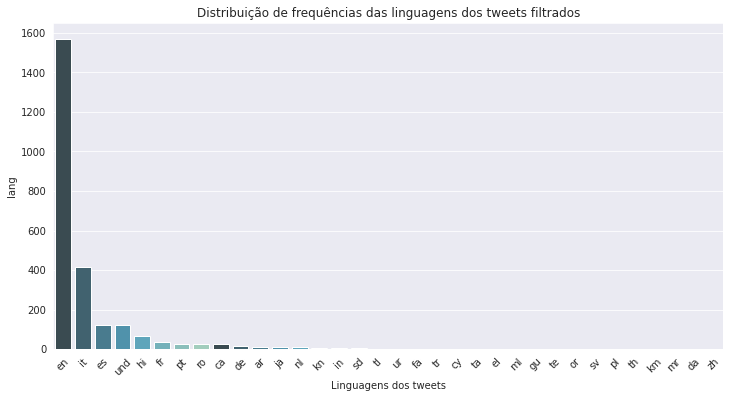

In [28]:
#Definindo o estilo para o gr√°fico.
sns.set_style('darkgrid')

#Configurando o tamanho da figura a ser gerada.
plt.figure(figsize=(12, 6))

#Configura√ß√µes de exibi√ß√£o: T√≠tulo e r√≥tulos.
plt.title('Distribui√ß√£o de frequ√™ncias das linguagens dos tweets filtrados')
plt.ylabel('Frequ√™ncia')
plt.xlabel('Linguagens dos tweets')

#Posicionando os ticks do eixo X, aplicando rota√ß√£o de 45¬∫ graus.
plt.xticks(rotation=45)

#Gerando gr√°fico de barras para a distribui√ß√£o dos tweets a partir da linguagem.
sns.barplot(x=languages, y=df['lang'].value_counts(),
            palette=sns.color_palette('GnBu_d' ,n_colors=8))

#Exibindo gr√°fico
plt.show()

In [29]:
#Filtrando somente os tweets cuja linguagem √© o ingl√™s.
en = df.loc[df.lang == 'en', :]
en = en['lang'].value_counts().sum()
en

1571

In [30]:
#Filtrando os tweets cuja linguagem n√£o √© o ingl√™s.
others = df.loc[df.lang != 'en', :]
others = others['lang'].value_counts().sum()
others

929

**Visto que o ingl√™s se apresenta como o idioma principal para a nossa amostra, podemos comparar a frequ√™ncia dos tweets entre essa l√≠ngua e as demais.**

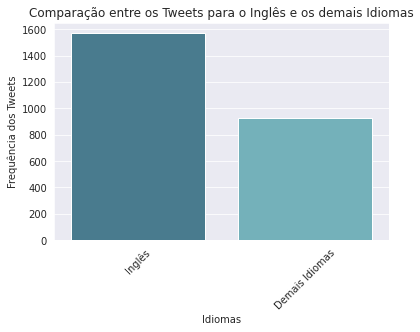

In [31]:
sns.set_style('darkgrid')

plt.title('Compara√ß√£o entre os Tweets para o Ingl√™s e os demais Idiomas')
plt.ylabel('Frequ√™ncia dos Tweets')
plt.xlabel('Idiomas')

plt.xticks(rotation=45)

sns.barplot(x=['Ingl√™s', 'Demais Idiomas'], y=[en, others], palette=sns.color_palette('GnBu_d' ,n_colors=2))

plt.show()

**Para come√ßarmos a trabalharmos com os dados de texto, podemos verificar descri√ß√µes estat√≠sticas em torno dos mesmos.**

Tweets podem ter no m√°ximo 288 caracteres, mas qual ser√° por exemplo o tamanho m√©dio para essa amostra ?

In [32]:
#Criando uma lista vazia.
size_tweets = []
#Percorrendo todos as linhas do data frame, na coluna de text e aplicando a contagem de caracteres atrav√©s da fun√ß√£o len() do python.
for tweet in df['text']:
  size = 0
  size = len(tweet)
  #Adicionando esses tamanhos a lista, para posterior adi√ß√£o no Data Frame.
  size_tweets.append(size)

In [33]:
#Visualizando a lista com os tamanhos para cada tweet.
size_tweets

[139,
 81,
 140,
 91,
 31,
 139,
 131,
 105,
 52,
 140,
 140,
 140,
 134,
 127,
 125,
 126,
 137,
 111,
 58,
 140,
 23,
 138,
 139,
 105,
 140,
 138,
 23,
 140,
 140,
 140,
 138,
 140,
 63,
 139,
 125,
 118,
 138,
 140,
 140,
 140,
 140,
 140,
 139,
 48,
 123,
 23,
 137,
 140,
 139,
 64,
 108,
 144,
 140,
 140,
 111,
 23,
 105,
 143,
 100,
 140,
 139,
 140,
 111,
 140,
 116,
 122,
 89,
 79,
 134,
 121,
 125,
 122,
 77,
 53,
 140,
 140,
 103,
 140,
 114,
 137,
 139,
 140,
 131,
 103,
 84,
 140,
 140,
 111,
 139,
 140,
 140,
 140,
 107,
 128,
 139,
 140,
 139,
 60,
 135,
 140,
 123,
 140,
 140,
 140,
 143,
 96,
 140,
 140,
 138,
 69,
 72,
 140,
 131,
 140,
 140,
 79,
 140,
 140,
 140,
 140,
 140,
 117,
 140,
 140,
 139,
 140,
 92,
 130,
 74,
 140,
 111,
 105,
 140,
 140,
 79,
 99,
 139,
 93,
 111,
 69,
 23,
 114,
 130,
 140,
 140,
 140,
 82,
 62,
 139,
 105,
 131,
 140,
 137,
 140,
 98,
 136,
 140,
 140,
 101,
 140,
 116,
 140,
 119,
 140,
 79,
 67,
 140,
 75,
 140,
 140,
 140,
 37,
 140

In [34]:
#Criando uma nova coluna no Data Frame, com o tamanho respectivo para cada tweet, de acordo com o √≠ndice.
df['size_tweets'] = size_tweets
df.head()

created_at                   id  ... lang size_tweets
0  Wed Jul 08 11:57:52 +0000 2020  1280833479832461312  ...   en         139
1  Wed Jul 08 11:57:52 +0000 2020  1280833478922248192  ...   it          81
2  Wed Jul 08 11:57:52 +0000 2020  1280833478867722240  ...   en         140
3  Wed Jul 08 11:57:52 +0000 2020  1280833478326718465  ...   es          91
4  Wed Jul 08 11:57:52 +0000 2020  1280833477768884226  ...  und          31

[5 rows x 9 columns]

**M√©dia:**

In [35]:
df['size_tweets'].mean()

118.7332

**Mediana:**

In [36]:
df['size_tweets'].median()

134.0

**Podemos verificar essas e outras medidas estat√≠sticas atrav√©s de um simples m√©todo do Pandas.**

In [37]:
#Arredondando os valores float e os tornando inteiros.
df['size_tweets'].describe().round().astype('int')

count    2500
mean      119
std        29
min        19
25%       104
50%       134
75%       140
max       164
Name: size_tweets, dtype: int64

**Temos aqui medidas de posi√ß√£o, varia√ß√£o e de tend√™ncia central.**



**count** = Quantidade de tweets.

**mean** = Tamanho m√©dio (em caracteres) dos tweets.

**std** = Desvio padr√£o para o tamanho (em caracteres) dos tweets.

**min** = Entrada min√≠ma, ou seja: tweet com menor n√∫mero de caracteres.

**25**% = 1¬∫ Quartil dos dados.

**50**% = 2¬∫ Quartil dos dados e respectivamente a mediana.

**75**% = 3¬∫ Quartil dos dados.

**max** = Entrada m√°xima, ou seja: tweet com maior n√∫mero de caracteres.

Podemos representar as medidas de posi√ß√£o atrav√©s do Gr√°fico Box-Plot, ou tamb√©m conhecido como gr√°fico de caixa e bigodes.

Nele, h√° a representa√ß√£o dos quartis e das entradas m√°xima e m√≠nima, dos dados.

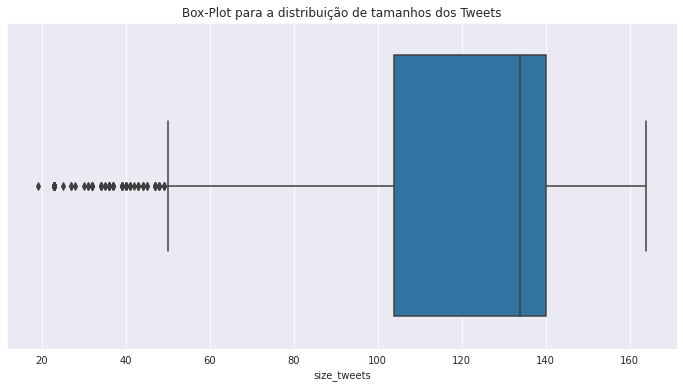

In [38]:
#Confiruando tamanho da figura.
plt.figure(figsize=(12, 6))

#Definindo t√≠tulo para o Gr√°fico.
plt.title('Box-Plot para a distribui√ß√£o de tamanhos dos Tweets')

#Gerando gr√°fico a partir da coluna com o tamanho dos tweets.
sns.boxplot(df['size_tweets'])

#Exibindo gr√°fico.
plt.show()

# Preprocessando os Dados

**Para a etapa de Pr√©-processamento utilizaremos somente os dados de texto, que s√£o referentes ao conte√∫do em si, dos tweets.**

In [39]:
#Importando Bibliotecas e M√≥dulos para Pr√©-Processamento.
import nltk
nltk.download('stopwords')
nltk.download('rslp')
import re

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package rslp to /root/nltk_data...
[nltk_data]   Unzipping stemmers/rslp.zip.


**Agora iremos trabalhar apenas com os dados de Texto, ou seja: iremos extrair os dados da coluna referente ao conte√∫do do Tweet.**

In [40]:
#Padr√£o utilizado em estudos de Aprendizado de M√°quina.
X = df['text']
X

0       @KhayaJames @eNCA I just think that going to s...
1       Iran ‚Äì Emergenza Coronavirus, stop a matrimoni...
2       Investing in low-carbon jobs offers huge poten...
3       @Gastro_original Bolsonaro muere por coronavir...
4                         @NewDay https://t.co/Gw4fJ3Acic
                              ...                        
2495    Áà≤‰ªÄÈ∫ºCCPÂú®Áñ´ÊÉÖÁàÜÁôºÊúüÈñìË¶ÅÊ±Ç‰∫∫ÂÄëÊà¥Âè£ÁΩ©?Áà≤‰ªÄÈ∫ºCCPË¶ÅÊääÊµ∑Â§ñÁöÑÈù¢ÂÖ∑ÈÉΩ‰π∞‰∏ãÁÑ∂ÂæåÈÅãÂõû‰∏≠Âúã?Âõ†Áà≤...
2496    Quando uno √® un tdc, lo √® sempre.\n\nCoronavir...
2497    City of Weston COVID-19 Data for July 8th, 202...
2498    Kenyans: Do you know anyone who has contracted...
2499    @pmbjpbppi @PMOIndia @DVSadanandGowda @mansukh...
Name: text, Length: 2500, dtype: object

**Com esses dados, podemos fazer um processo famoso na an√°lise descritivo de dados, que √© a gera√ß√£o de uma Word Cloud, ou nuvem de palavras, que exibe as palavras mais frequentes nos textos filtrados.**

In [41]:
#Agrupando todos os dados de Texto.
summary = " ".join(s for s in X)

In [42]:
#Visualizando os dados.
summary

'@KhayaJames @eNCA I just think that going to school it totally putting our lives as students and teachers in grave‚Ä¶ https://t.co/BrQc2n5AoS Iran ‚Äì Emergenza Coronavirus, stop a matrimoni e\xa0funerali https://t.co/q3PfwCUlRr Investing in low-carbon jobs offers huge potential for ‚Äòlevelling up‚Äô the UK, offsetting the damage done to local e‚Ä¶ https://t.co/moMXgxt8MU @Gastro_original Bolsonaro muere por coronavirus, mi profec√≠a solo es a 15 d√≠as vista jajaj @NewDay https://t.co/Gw4fJ3Acic ‡§Æ‡§æ‡§®‡§®‡•Ä‡§Ø ‡§Æ‡•Å‡§ñ‡•ç‡§Ø‡§Æ‡§Ç‡§§‡•ç‡§∞‡•Ä ‡§ú‡§®‡§æ‡§¨ @ArvindKejriwal ‡§ú‡•Ä ‡§ï‡§ø ‡§¶‡§ø‡§≤‡•ç‡§≤‡•Ä ‡§ï‡•Ä ‡§ú‡§®‡§§‡§æ ‡§∏‡•á ‡§Ö‡§™‡•Ä‡§≤ ‡§π‡•à  ‡§ï‡•ã‡§∞‡•ã‡§®‡§æ ‡§∏‡•á ‡§†‡•Ä‡§ï ‡§π‡•ã‡§ï‡§∞ ‡§Ü‡§Ø‡§æ ‡§π‡•Å‡§Ü ‡§µ‡•ç‡§Ø‡§ï‡•ç‡§§‡§ø ‡§π‡•ã ‡§∏‡§ï‡•á‚Ä¶ https://t.co/qwYmpDvLxe mundo/\n\nUn estudio hecho en Espa√±a desalienta la esperanza de la inmunidad de reba√±o contra el coronavirus‚Ä¶ https://t.co/A5ScMOTBlK WHO confirms there\'s \'emerging evidence\' of airborne trans

In [43]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [44]:
#Criando inst√¢ncia para uma WordCloud e configurando seus par√¢metros.
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800,
                      max_words=200, max_font_size=200,
                      min_font_size=10).generate(summary)

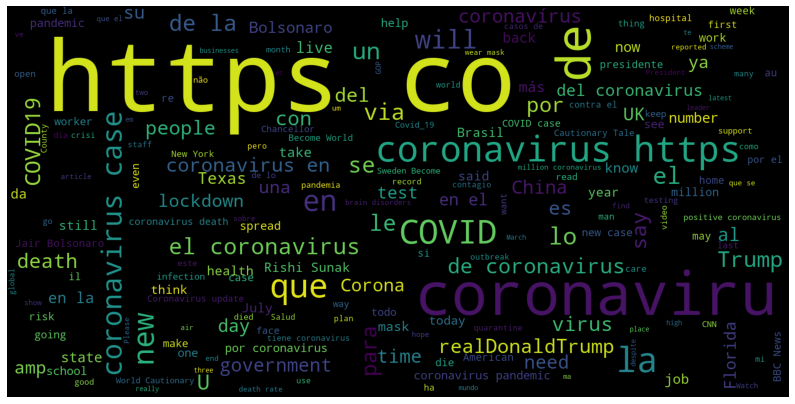

In [46]:
#Configurando exibi√ß√£o da imagem.
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

**Podemos verificar que sem a remo√ß√£o de stop words, a visualiza√ß√£o fica polu√≠da, demarcada por links, urls e palavras que n√£o contribuem para a an√°lise.**

Para isso, podemos aplicar uma famosa t√©cnica de pr√©-processamento de texto. Como os tweets para o ingl√™s comp√µem a maior parte do nosso corpus, podemos come√ßar filtrando somente eles.

In [144]:
english = df.loc[df.lang == 'en', 'text']

**Stop words s√£o palavras que podem ser consideradas irrelevantes para o conjunto de resultados.**

Exemplos: as, os, um, uma, com, de, da, para, etc.

In [145]:
def Remove_stopWords(instance):
  #Utiliza os recursos da biblioteca NLTK para verificar as Stopwords para o Ingl√™s.
  stopwords = set(nltk.corpus.stopwords.words('english'))
  #Cria uma lista com as palavras restantes (N√£o Stopwords).
  words = [i for i in instance.split() if not i in stopwords]
  #Retorna a lista de palavras em formato de string.
  return(" ".join(words))

In [146]:
#Aplica√ß√£o da remo√ß√£o de StopWords nos nossos dados de texto.
english = [Remove_stopWords(i) for i in english]

**Devemos tamb√©m aplicar uma limpeza nos dados. Por serem advindos de uma rede social √© marcante a presen√ßa de links, urls e sinais de pontua√ß√£o**

Podemos tamb√©m padronizar o texto. Tudo isso atrav√©s da biblioteca de express√µes regulares.

In [147]:
def clean_data(instance):
  #Remo√ß√£o de sinais de pontua√ß√£o e links, padroniza√ß√£o do texto (Letras Min√∫sculas) atrav√©s da biblioteca de Express√µes Regulares.
  instance = re.sub(r"http\S+", "", instance).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','')
  return(instance)

In [148]:
#Aplica√ß√£o da limpeza nos nossos dados de texto.
english = [clean_data(i) for i in english]

In [149]:
summary_en = " ".join(s for s in english)

In [150]:
#Visualizando os dados.
summary_en

'@khayajames @enca i think going school totally putting lives students teachers grave‚Ä¶  investing lowcarbon jobs offers huge potential ‚Äòlevelling up‚Äô uk, offsetting damage done local e‚Ä¶  who confirms there\'s \'emerging evidence\' airborne transmission coronavirus  great news!!! texas pass 10k new cases one day! testing increased dramatically new cases mean‚Ä¶  california, michigan three states ‚Äì plus district columbia ‚Äì suing education secretary betsy d‚Ä¶  @autarkis84 @godofthegallows politics 2 sides disagreeing america\'s structure whole right pre‚Ä¶  224434 stationary vehicle, n2 outbound horseshoe bend left lane closed no delays #coronavirus‚Ä¶  opinion | trump uses coronavirus impede immigration his aim foreign students new low  exclusive inspiring tale nurse survived covid 19 resumed work   #covid19 #coronavirus nhs wales chief executive says \'green zones\' set hospitals, gp surgeries pharmacies be‚Ä¶  and repeat! what chapter yall? * * * #goodmorning #gooooooomawn

In [155]:
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800,
                      max_words=150, max_font_size=200,
                      min_font_size=10).generate(summary_en)

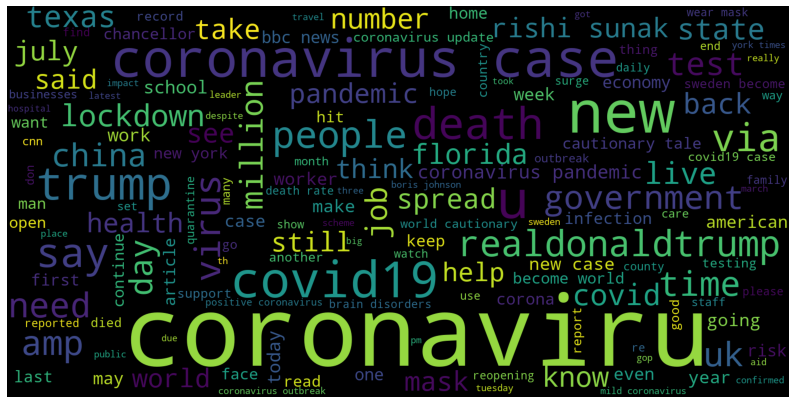

In [156]:
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

**Podemos repetir o processo para os tweets em outro idioma, como o portugu√™s.**

Utilizaremos o mesmo m√≥dulo da biblioteca NLTK, mas com o pacote para o portugu√™s.

In [157]:
portuguese = df.loc[df.lang == 'pt', 'text']

In [158]:
portuguese

16      URGENTE!\nBOLSONARO VETOU √ÅGUA PARA IND√çGENAS ...
22      Bolsonaro veta artigo que prev√™ acesso a √°gua ...
28      Seria esse alarde com rela√ß√£o ao teste + p/o c...
63      Males que v√™m para o bem üëáüèª\n\n‚≠ê #BBAS3 - Com ...
92      Pandemia do coronav√≠rus deixa 73 pa√≠ses sob ri...
                              ...                        
2381    Caxias do Sul chegou a 24 mortes causadas por ...
2394                  Editorial ‚úçÔ∏èhttps://t.co/kd3fQGaddq
2417    Transmiss√£o do coronav√≠rus volta a acelerar no...
2432    entre os vetos, est√° a "obrigatoriedade de a U...
2447    UOL Not√≠cias: Coronav√≠rus: OMS n√£o descarta tr...
Name: text, Length: 123, dtype: object

**Podemos juntar as duas fun√ß√µes aplicadas acima e construir uma √∫nica, para ent√£o aplicar nos dados.**

In [159]:
def Preprocessing(instance):
      instance = re.sub(r"http\S+", "", instance).lower().replace('.', '').replace(';','').replace('-','').replace(':', '').replace(')', '')
      stopwords = set(nltk.corpus.stopwords.words('portuguese'))
      words = [i for i in instance.split() if not i in stopwords]
      return (" ".join(words))

In [160]:
portuguese = [Preprocessing(i) for i in portuguese]

In [161]:
summary_pt = " ".join(s for s in portuguese)

In [162]:
summary_pt

'urgente! bolsonaro vetou √°gua ind√≠genas quilombolas! bolsonaro vetou acesso universal √°gua pot√°vel no‚Ä¶ bolsonaro veta artigo prev√™ acesso √°gua pot√°vel lei prote√ß√£o ind√≠genas contra coronav√≠rus | revista‚Ä¶ alarde rela√ß√£o teste + p/o coronavirus pres bolsonario uso cloroquina, forma ag‚Ä¶ males v√™m bem üëáüèª ‚≠ê #bbas3 home office, bb vai devolver 19 35 edif√≠cios escrit√≥rios pa√≠s,‚Ä¶ pandemia coronav√≠rus deixa 73 pa√≠ses sob risco escassez rem√©dios aids @danielscola @nytimes brazil sempre ignorado m√≠dia americana agora, bolsonaro/coronav√≠rus viramos c‚Ä¶ @athaydem pessoas perderam vergonha cara desejo simb√≥lico, dif√≠cilmente reinfectado‚Ä¶ cooperativismo padre theodor amstad sicredi pioneira rs rs coronav√≠rus ‚Äì live sicredi pioneira rs destaca‚Ä¶ turismo duas cidades goi√°s casos novo coronav√≠rus lagoa santa domingos ati‚Ä¶ ap√≥s 1 m√™s tecido capaz eliminar novo coronav√≠rus dois minutos chega mercado #cdmf #cepid‚Ä¶ bbc news brasil imprensa internacion

In [163]:
wordcloud = WordCloud(background_color="black",
                      width=1600, height=800,
                      max_words=150, max_font_size=200,
                      min_font_size=10).generate(summary_pt)

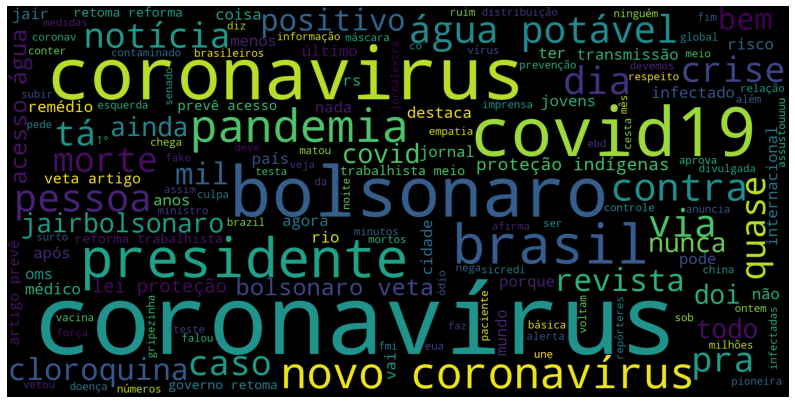

In [164]:
fig, ax = plt.subplots(figsize=(14,10))
ax.imshow(wordcloud, interpolation='bilinear')
ax.set_axis_off()

plt.imshow(wordcloud);

# Aplicando Outras T√©cnicas de Pr√©-Processamento de Texto

**Stemming √© a t√©cnica de reduzir uma palavra para o seu radical. Radical √© um morfema b√°sico , indivis√≠vel e comum a uma s√©rie de palavras.**

Exemplo: O radical de Livro √©: Livr

In [165]:
def Aplica_stemming(instancia):
  #Criando uma inst√¢ncia de um Stemmer da biblioteca NLTK.
  stemmer = nltk.stem.RSLPStemmer()
  palavras = []
  #Quebrando a senten√ßa e percorrendo todas as palavras.
  for i in instancia.split():
    #Aplicando a t√©cnica de Stemming nas palavras e as colocando na lista.
    palavras.append(stemmer.stem(i))
  return ("".join(palavras))

**Criando Fun√ß√£o que Automatiza a Aplica√ß√£o das 3 fun√ß√µes, para o portugu√™s.**

In [166]:
#Criando Fun√ß√£o para Pr√©-Processamento e Limpeza dos Dados. Aplica√ß√£o de Stemming, remo√ß√£o de stopwords, padroniza√ß√£o de texto e limpeza.
def Preprocessa_dados(instancia):
    instancia = re.sub(r"http\S+", "", instancia).lower().replace('.','').replace(';','').replace('-','').replace(':','').replace(')','').replace('"','').replace('@', '')
    stopwords = set(nltk.corpus.stopwords.words('portuguese'))
    palavras = [i for i in instancia.split() if not i in stopwords]
    stemmer = nltk.stem.RSLPStemmer()
    palavras = []
    for word in instancia.split():
      palavras.append(stemmer.stem(word))
    return (" ".join(palavras))

In [ ]:
#Um outro Exemplo de Aplica√ß√£o do Pr√©-Processamento em Dados de Texto.
texto = Preprocessa_dados('hoje est√° bastante frio #...@ !, muito.. https://google.com')
texto

'hoj est bast fri # !, muit'